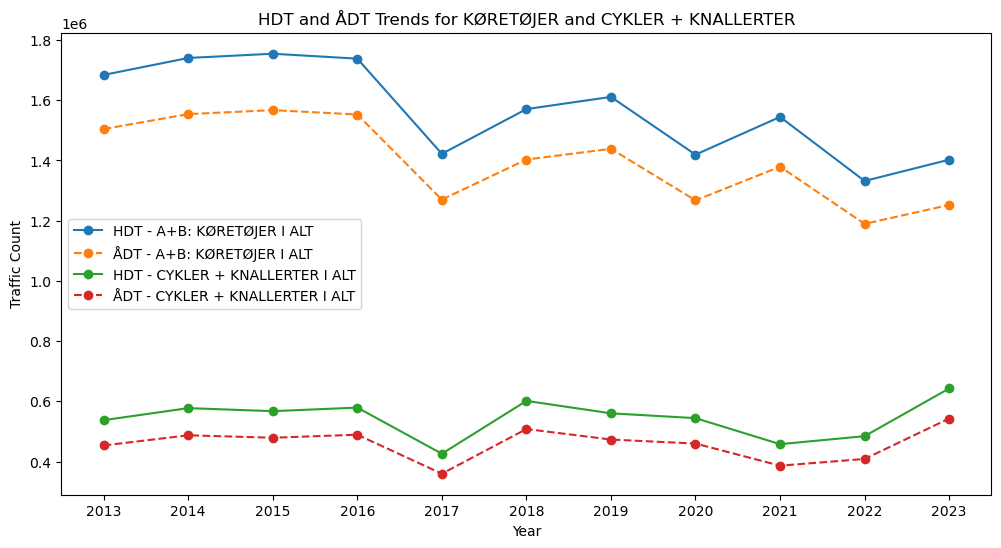

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def main(input_file, output_file):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(input_file)
    
    # Filter rows based on 'KATEGORI'
    df = df[df['KATEGORI'].isin(["A+B: KØRETØJER I ALT", "CYKLER + KNALLERTER I ALT"])]

    # Group by relevant columns and sum 'TOTAL'
    df = df.groupby(['TS', 'VEJNAVN', 'ÅR', 'KATEGORI'], as_index=False).agg({'TOTAL': 'sum', 'TUNG %': 'sum', "LADCYKLER %": "sum"})
 
    # Create new columns for adjusted 'TOTAL' based on 'KATEGORI'
    df['ÅDT'] = df.apply(
        lambda row: row['TOTAL'] * 1.17 if row['KATEGORI'] == "A+B: KØRETØJER I ALT" else row['TOTAL'] * 1.03,
        axis=1
    )
    
    df['HDT'] = df.apply(
        lambda row: row['TOTAL'] * 1.31 if row['KATEGORI'] == "A+B: KØRETØJER I ALT" else row['TOTAL'] * 1.22,
        axis=1
    )

    # Round 'ÅDT' and 'HDT' to the nearest 100
    df['ÅDT'] = df['ÅDT'].round(-2)
    df['HDT'] = df['HDT'].round(-2)
    
    # Define the desired order
    column_order = ["TS", "ÅR", "VEJNAVN", "KATEGORI", "TOTAL", "HDT", "ÅDT", "TUNG %", "LADCYKLER %"]
    
    # Reorder columns
    df = df[column_order]

    # Save the aggregated and sorted DataFrame to a new file
    df.to_csv(output_file, index=False)
    
    # Visualization
    df['ÅR'] = pd.to_numeric(df['ÅR'], errors='coerce')
    df_grouped = df.groupby(["ÅR", "KATEGORI"])[["HDT", "ÅDT"]].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot all four lines
    for cat in df_grouped["KATEGORI"].unique():
        subset = df_grouped[df_grouped["KATEGORI"] == cat]
        ax.plot(subset["ÅR"], subset["HDT"], marker="o", linestyle="-", label=f"HDT - {cat}")
        ax.plot(subset["ÅR"], subset["ÅDT"], marker="o", linestyle="--", label=f"ÅDT - {cat}")
    
    ax.set_xlabel("Year")
    ax.set_ylabel("Traffic Count")
    ax.set_xticks(df_grouped["ÅR"].unique())
    ax.legend()
    plt.title("HDT and ÅDT Trends for KØRETØJER and CYKLER + KNALLERTER")
    plt.show()

# Define input and output file paths
input_file = "Cleaned_data.csv"
output_file = "Manipuleret data/Generel.csv"

# Run the function
main(input_file, output_file)


In [5]:
import matplotlib.pyplot as plt

# Ensure 'Year' is present (rename if necessary)
df = df.rename(columns={"ÅR": "Year"}) if "ÅR" in df.columns else df

# Convert Year to int if needed
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Group by Year and Category, summing HDT and ÅDT
df_grouped = df.groupby(["Year", "KATEGORI"])[["HDT", "ÅDT"]].sum().reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define categories and bar width
categories = df_grouped["KATEGORI"].unique()
bar_width = 0.4
colors = ["blue", "green"]

# Plot HDT as bars
for i, cat in enumerate(categories):
    subset = df_grouped[df_grouped["KATEGORI"] == cat]
    ax1.bar(subset["Year"] + (i * bar_width), subset["HDT"], width=bar_width, label=f"HDT - {cat}", alpha=0.7, color=colors[i])

# Create a second axis for ÅDT
ax2 = ax1.twinx()

# Plot ÅDT as lines
for i, cat in enumerate(categories):
    subset = df_grouped[df_grouped["KATEGORI"] == cat]
    ax2.plot(subset["Year"], subset["ÅDT"], marker="o", linestyle="-", label=f"ÅDT - {cat}", color=colors[i])

# Labels and legend
ax1.set_xlabel("Year")
ax1.set_ylabel("HDT (Weekday Daily Traffic)", color="blue")
ax2.set_ylabel("ÅDT (Annual Daily Traffic)", color="green")
ax1.set_xticks(df_grouped["Year"].unique())
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("HDT and ÅDT Trends for KØRETØJER and CYKLER + KNALLERTER")
plt.show()


NameError: name 'df' is not defined